In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from top_bottom_moseq.orthographic import *
from top_bottom_moseq.util import load_matched_frames, load_intrinsics
from top_bottom_moseq.segmentation import segment_session
from top_bottom_moseq.inpainting import inpaint_session
from top_bottom_moseq.dim_reduction import encode_session
from top_bottom_moseq.qc import save_qc_movie, grab_qc_frame

#### Specify paths

In [2]:
prefix = '/n/groups/datta/caleb/21_2_19_segmentation_redux/tb_jonah/20220823_gmou78/20220823_gmou78'
intrinsics_prefix = '/n/groups/datta/Jonah/public_top_bottom/public_top_bottom/camera_intrinsics'
transforms_path = '/n/groups/datta/caleb/21_2_19_segmentation_redux/tb_jonah/camera_3D_transforms.p'

mouse_segmentation_weights = '/n/groups/datta/caleb/21_2_19_segmentation_redux/public_top_bottom/weights/unet_mouse_v2_IRonly.pt'
occlusion_segmentation_weights = '/n/groups/datta/caleb/21_2_19_segmentation_redux/public_top_bottom/weights/unet_occl_v4.pt'
inpainting_weights = '/n/groups/datta/caleb/21_2_19_segmentation_redux/public_top_bottom/train_inpainting/weights/{}-unet-intermediate.pt'
localization_weights = '/n/groups/datta/caleb/21_2_19_segmentation_redux/public_top_bottom/dim_reduction/weights/localizationNet_temporal.pt'
autoencoder_weights = '/n/groups/datta/caleb/21_2_19_segmentation_redux/public_top_bottom/dim_reduction/weights/autoencoder_temporal.pt'


#### Run pipeline

In [ ]:
intrinsics = {name:load_intrinsics(intrinsics_prefix+'.'+name+'.json') for name in ['top','bottom']}
transforms = pickle.load(open(transforms_path,'rb'))

segment_session(prefix, mouse_segmentation_weights, occlusion_segmentation_weights)  
orthographic_reprojection(prefix, transforms, intrinsics)
inpaint_session(prefix, inpainting_weights)
encode_session(prefix, autoencoder_weights, localization_weights)

segmentation, top: 44819it [49:14, 14.19it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

segmentation, top: 76337it [1:26:57, 13.99it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

segmentation, top: 107742it [2:05:28, 14.00it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_lim

#### QC: look at frame

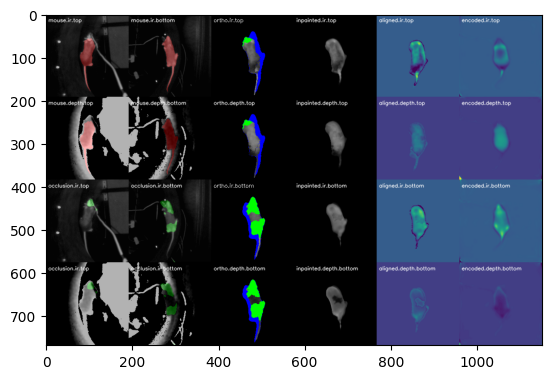

In [3]:
frame_ix = 200 # pick any frame
plt.imshow(grab_qc_frame(prefix, frame_ix))
plt.gcf().set_size_inches((20,10))

#### QC: make video

In [4]:
num_frames = 1000 # choose length
save_qc_movie(prefix, num_frames)

1000it [01:05, 15.25it/s]


QC video written to /n/groups/datta/caleb/21_2_19_segmentation_redux/tb_jonah/20220823_gmou78/20220823_gmou78.QC.mp4
